<center><h1 style="font-size: 2em; font-weight: bold;">黑白图像着色模型微调实践</h1></center>

<hr style="height: 5px; background: rgb(204, 255, 255); margin: 20px 0; box-shadow: 0px 0px 4px 2px rgba(204,204,204,1);">

<div style="background-color: rgba(128, 128, 128, 0.3);">
模型方法的选择。本材料中选择的黑白图像着色模型是在 2016 年欧洲计算机视觉会议中提出的。

《Colorful Image Colorization》是 Richard Zhang 等人在 2016 年发表的一篇论文，它提出了一种基于卷积神经网络的自动彩色图像着色方法。

这篇论文的主要贡献在于利用卷积神经网络自动学习图像中灰度值和颜色之间的映射关系，从而实现自动彩色图像着色。论文提出的方法包括两个步骤：第一步是将输入的灰度图像转换为 Lab 色彩空间，将其中的亮度信息与颜色信息分离，第二步是利用卷积神经网络对颜色信息进行预测，最终将预测结果与原始灰度图像的亮度信息结合得到彩色图像。

为了提高模型的准确率，论文中采用了一系列的技巧，包括利用全局平均池化层减少模型的参数数量、采用高斯金字塔来处理不同尺度的图像、使用 softmax 函数对颜色空间进行归一化等。此外，论文中还采用了一种自适应的损失函数，能够根据不同像素点之间的颜色距离进行动态调整，从而提高了模型的表现。

实验结果显示，该方法能够在不需要任何手工标注的情况下，对灰度图像进行准确的彩色图像着色，且着色结果具有较好的视觉效果和颜色鲜艳度。该方法在自动彩色化领域得到了广泛的应用和认可。

他们的官方代码可参见，[[GitHub - richzhang / colorization](https://github.com/richzhang/colorization)]。
    
</div>


<center><h2>相关背景知识</h2></center>

<hr />

### 一、 黑白照片着色

黑白照片着色的相关知识可参见我们 [课程主页](https://highschool.opentai.org/) 中关于 **寻找走失儿童** 实例项目的介绍。

### 二、 深度学习框架 `PyTorch`

在本次实践中，我们将使用 `PyTorch` 作为基础工具。

PyTorch是一个基于Python的科学计算库，主要用于构建深度学习模型。它由Facebook于2016年推出，是目前深度学习领域中最受欢迎的开源框架之一。PyTorch具有以下几个特点：

- 动态图：PyTorch使用动态图，这意味着可以在编写代码的同时定义和修改计算图。这种方式更加灵活，便于调试和实验，也更加适合研究型的工作。

- 易于使用：PyTorch具有简单、清晰的API，使得使用PyTorch构建深度学习模型变得非常容易。此外，PyTorch还提供了丰富的文档和教程，帮助用户更好地了解和使用PyTorch。

- 优化器：PyTorch内置了多种优化器，如SGD、Adam等，方便用户选择合适的优化器对模型进行训练。

- 可扩展性：PyTorch可以与其他Python库无缝集成，如NumPy、SciPy等。此外，PyTorch还提供了接口，允许用户将PyTorch模型部署到其他框架上。

- GPU加速：PyTorch支持GPU加速，可以充分利用GPU的并行计算能力，加速深度学习模型的训练和推理。

### 三、 模型微调

#### 3.1 为什么要微调

模型微调是指利用预训练好的模型作为初始模型，在特定数据集上进行调整以提高性能的过程。微调的主要目的是通过在预训练模型的基础上进一步优化模型，以适应特定的应用场景。

预训练模型通常是在大规模数据集上训练的，但是在特定应用场景下，可能只有较小的数据集。微调可以通过在小规模数据集上训练模型，减少过拟合和提高泛化能力。

在本次实例中，考虑到计算资源的限制，大多数同学无法使用 `GPU` 等计算设备，我们的课程实例项目以模型微调为基调展开。

#### 3.2 如何微调

微调的步骤通常包括以下几个阶段：

- 数据集准备：收集自己的数据集，并将其分为训练集、验证集和测试集。此外，还需要将数据集转换为模型所需的格式。

- 模型选择和导入：选择合适的预训练模型，并导入到自己的代码中。

- 冻结预训练层：冻结预训练模型的前几层，使它们的权重不会被更新。这样做可以避免破坏预训练模型已经学到的特征。

- 修改输出层：将预训练模型的输出层替换为适合自己数据集的新的输出层。这样做可以使模型适应自己数据集的特点。

- 训练模型：使用自己的数据集对模型进行训练，一般采用迭代式的方法，每次迭代都会将一批数据输入到模型中，并根据输出和真实值之间的误差来更新模型的参数。

- 评估模型：使用验证集对模型进行评估，计算模型的准确率和损失值。如果模型在验证集上表现良好，则可以使用测试集进行最终的评估。

<center><h2>数据集准备</h2></center>

<hr />

### 一、数据收集

彩色人脸图像生成。[**thispersondoesnotexist.com**](https://this-person-does-not-exist.com/en) 是一个基于人工智能技术的网站，它可以生成各种面部特征非常逼真的虚拟人脸图像。这些图像是由一种称为生成对抗网络（GAN）的机器学习模型生成的，该模型能够从许多真实照片中学习，并生成看起来与真实人类面部特征非常相似的虚拟人脸。

这个网站的界面非常简单，用户每次访问时会看到一个全新的虚拟人脸图像，这个图像是基于随机种子生成的。用户可以一直刷新页面，直到找到自己喜欢的图像为止。同时，用户还可以在该网站上下载虚拟人脸图像并在自己的项目中使用。

虽然这个网站生成的虚拟人脸非常逼真，但它们并不是真实存在的人物。这些图像只是一个机器学习模型的输出，但对于那些需要使用大量人脸数据来训练模型的人工智能项目来说，这个网站提供了一种方便、高效的方式来获取大量虚拟人脸数据。

针对以上，我们写了一个数据收集脚本来获取大量的彩色虚拟人脸照片。

- 其中 `IMG_NUM` 为下载的图片数量
- `IMG_ROOT` 为图像下载的路径，例如此处为 `imgs` 则会将图像下载到当前文件夹下的 `imgs` 文件夹中。

In [1]:
import os
import requests as rqs
from lxml import etree

# u-y-b
WARNING = "\033[4m\033[93m\033[1m{}\033[0m\033[0m\033[0m"
INFO = "\033[1m{}\033[0m"

IMG_NUM = 1000
IMG_ROOT = "imgs"


URL = "https://this-person-does-not-exist.com/zh"
URLROOT = "https://this-person-does-not-exist.com"
IMG_XPATH = """//*[@id="avatar"]/@src"""


if __name__ == "__main__":
    img_root = IMG_ROOT
    if os.path.isdir(img_root):
        num_img = len(os.listdir(img_root))
        start_idx = num_img if num_img < IMG_NUM else IMG_NUM
        print(WARNING.format("START DOWNLOADING DATA FROM LAST STOP..."))
    else:
        os.makedirs(img_root)
        start_idx = 0
        print(WARNING.format("START DOWNLOADING DATA FROM SCRATCH..."))
    with rqs.Session() as session:
        for img_idx in range(start_idx, IMG_NUM):
            print(WARNING.format(f"PROCESSING IMG-{img_idx + 1}"))

            print(INFO.format(f"\tget html webpage"), end=" .... \t")
            req = session.get(URL)
            print(WARNING.format(f"DONE"))

            data = req.content
            html = etree.HTML(data)
            result = html.xpath(IMG_XPATH)
            url_path = result[0]
            img_url = f"{URLROOT}{url_path}"
            img_fn = img_url.split("/")[-1]
            img_pth = os.path.join(img_root, img_fn)

            print(INFO.format(f"\tget image data"), end=" .... \t")
            img_data = session.get(img_url).content
            print(WARNING.format(f"DONE"))

            print(INFO.format(f"\tsave image @ {img_pth}"), end=" .... \t")
            with open(img_pth, "wb") as f:
                f.write(img_data)
            print(WARNING.format(f"DONE"))

START DOWNLOADING DATA FROM LAST STOP...


### 二、数据集封装

数据集封装使得数据集的处理变得更加方便和高效。

In [2]:
from torch.utils.data import Dataset
import os
from skimage import color
import torch
import random

DATASET_MAX_ITEM = 1000

class FakeFaceDataset(Dataset):
    def __init__(self, data_root):
        self.data_root = data_root
        self.cfiles = self._get_color_files()

    def _get_color_files(self):
        cfiles = os.listdir(self.data_root)
        cfiles = [os.path.join(self.data_root, cfile) for cfile in cfiles if cfile.split(".")[-1] == "jpg"]
        cfiles = random.sample(cfiles, DATASET_MAX_ITEM if DATASET_MAX_ITEM < len(cfiles) else len(cfiles))
        return cfiles
    
    def __len__(self):
        return len(self.cfiles)
    
    def __getitem__(self, idx):
        imgfile = self.cfiles[idx]
        img_np = load_img(imgfile)
        img_np = resize_img(img_np, HW=(256, 256), resample=3)
        
        img_np_lab = color.rgb2lab(img_np)
        img_np_l = img_np_lab[:,:,0]
        
        img_ts_lab = torch.Tensor(img_np_lab).permute(2, 0, 1)
        img_ts_l = torch.Tensor(img_np_l)[None, :]
        
        return img_ts_lab, img_ts_l

若干数据处理方法定义

In [3]:
from PIL import Image
import numpy as np
from skimage import color
import torch
import torch.nn.functional as F

# 从图像路径读取图像
def load_img(img_path):
    out_np = np.asarray(Image.open(img_path))
    if(out_np.ndim==2):
        out_np = np.tile(out_np[:,:,None],3)
    return out_np

# 调整图像大小
def resize_img(img, HW=(256,256), resample=3):
    return np.asarray(Image.fromarray(img).resize((HW[1],HW[0]), resample=resample))

# 输入模型前数据处理
def preprocess_img(img_rgb_orig, HW=(256,256), resample=3):
    img_rgb_rs = resize_img(img_rgb_orig, HW=HW, resample=resample)
    
    img_lab_orig = color.rgb2lab(img_rgb_orig)
    img_lab_rs = color.rgb2lab(img_rgb_rs)
    
    img_l_orig = img_lab_orig[:,:,0]
    img_l_rs = img_lab_rs[:,:,0]
    
    tens_orig_l = torch.Tensor(img_l_orig)[None,None,:,:]
    tens_rs_l = torch.Tensor(img_l_rs)[None,None,:,:]
    
    return (tens_orig_l, tens_rs_l)

# 模型输出后数据处理
def postprocess_tens(tens_orig_l, out_ab, mode='bilinear'):
    # tens_orig_l 1 x 1 x H_orig x W_orig
    # out_ab      1 x 2 x H x W
    
    HW_orig = tens_orig_l.shape[2:]
    HW = out_ab.shape[2:]
    
    if(HW_orig[0]!=HW[0] or HW_orig[1]!=HW[1]):
        out_ab_orig = F.interpolate(out_ab, size=HW_orig, mode='bilinear')
    else:
        out_ab_orig = out_ab
    
    out_lab_orig = torch.cat((tens_orig_l, out_ab_orig), dim=1)
    return color.lab2rgb(out_lab_orig.data.cpu().numpy()[0,...].transpose((1,2,0)))

### 三、数据集实例化

在此处将会对上方代码块封装的数据集进行实例化，并对数据集中若干示例进行可视化。

In [4]:
ffdataset = FakeFaceDataset("imgs")

torch.Size([3, 256, 256]) torch.Size([1, 256, 256])


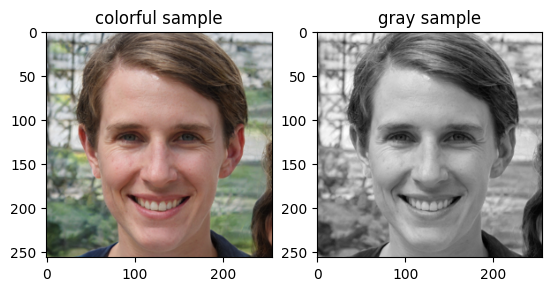

In [5]:
from skimage import color
import matplotlib.pyplot as plt
from PIL import Image

for _, (img_lab, img_l) in enumerate(ffdataset):
    print(img_lab.shape, img_l.shape)
    img_lab, img_l = img_lab.squeeze(), img_l.squeeze()
    plt.subplot(1, 2, 1)
    plt.imshow(color.lab2rgb(img_lab.numpy().transpose(1, 2, 0)))
    plt.title("colorful sample")
    plt.subplot(1, 2, 2)
    plt.imshow(img_l.numpy(), cmap='gray')
    plt.title("gray sample")
    break

<center><h2>模型选择和导入</h2></center>

<hr />



### 一、模型定义

以下是模型定义的部分。在这个部分，我们定义了一个 `Colorizer` 的模型，模型能够允许一张黑白照片作为输入，并输出一张通过计算得到的彩色照片。

In [6]:
import torch.nn as nn


class Colorizer(nn.Module):
    def __init__(self, norm_layer=nn.BatchNorm2d):
        super(Colorizer, self).__init__()
        
        self.l_cent = 50.
        self.l_norm = 100.
        self.ab_norm = 110.

        model1=[nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1, bias=True),]
        model1+=[nn.ReLU(True),]
        model1+=[nn.Conv2d(64, 64, kernel_size=3, stride=2, padding=1, bias=True),]
        model1+=[nn.ReLU(True),]
        model1+=[norm_layer(64),]

        model2=[nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1, bias=True),]
        model2+=[nn.ReLU(True),]
        model2+=[nn.Conv2d(128, 128, kernel_size=3, stride=2, padding=1, bias=True),]
        model2+=[nn.ReLU(True),]
        model2+=[norm_layer(128),]

        model3=[nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1, bias=True),]
        model3+=[nn.ReLU(True),]
        model3+=[nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1, bias=True),]
        model3+=[nn.ReLU(True),]
        model3+=[nn.Conv2d(256, 256, kernel_size=3, stride=2, padding=1, bias=True),]
        model3+=[nn.ReLU(True),]
        model3+=[norm_layer(256),]

        model4=[nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1, bias=True),]
        model4+=[nn.ReLU(True),]
        model4+=[nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1, bias=True),]
        model4+=[nn.ReLU(True),]
        model4+=[nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1, bias=True),]
        model4+=[nn.ReLU(True),]
        model4+=[norm_layer(512),]

        model5=[nn.Conv2d(512, 512, kernel_size=3, dilation=2, stride=1, padding=2, bias=True),]
        model5+=[nn.ReLU(True),]
        model5+=[nn.Conv2d(512, 512, kernel_size=3, dilation=2, stride=1, padding=2, bias=True),]
        model5+=[nn.ReLU(True),]
        model5+=[nn.Conv2d(512, 512, kernel_size=3, dilation=2, stride=1, padding=2, bias=True),]
        model5+=[nn.ReLU(True),]
        model5+=[norm_layer(512),]

        model6=[nn.Conv2d(512, 512, kernel_size=3, dilation=2, stride=1, padding=2, bias=True),]
        model6+=[nn.ReLU(True),]
        model6+=[nn.Conv2d(512, 512, kernel_size=3, dilation=2, stride=1, padding=2, bias=True),]
        model6+=[nn.ReLU(True),]
        model6+=[nn.Conv2d(512, 512, kernel_size=3, dilation=2, stride=1, padding=2, bias=True),]
        model6+=[nn.ReLU(True),]
        model6+=[norm_layer(512),]

        model7=[nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1, bias=True),]
        model7+=[nn.ReLU(True),]
        model7+=[nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1, bias=True),]
        model7+=[nn.ReLU(True),]
        model7+=[nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1, bias=True),]
        model7+=[nn.ReLU(True),]
        model7+=[norm_layer(512),]

        model8=[nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1, bias=True),]
        model8+=[nn.ReLU(True),]
        model8+=[nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1, bias=True),]
        model8+=[nn.ReLU(True),]
        model8+=[nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1, bias=True),]
        model8+=[nn.ReLU(True),]

        model8+=[nn.Conv2d(256, 313, kernel_size=1, stride=1, padding=0, bias=True),]

        self.model1 = nn.Sequential(*model1)
        self.model2 = nn.Sequential(*model2)
        self.model3 = nn.Sequential(*model3)
        self.model4 = nn.Sequential(*model4)
        self.model5 = nn.Sequential(*model5)
        self.model6 = nn.Sequential(*model6)
        self.model7 = nn.Sequential(*model7)
        self.model8 = nn.Sequential(*model8)

        self.softmax = nn.Softmax(dim=1)
        self.model_out = nn.Conv2d(313, 2, kernel_size=1, padding=0, dilation=1, stride=1, bias=False)
        self.upsample4 = nn.Upsample(scale_factor=4, mode='bilinear')

    def normalize_l(self, in_l):
        return (in_l-self.l_cent)/self.l_norm

    def unnormalize_l(self, in_l):
        return in_l*self.l_norm + self.l_cent
        
    def normalize_ab(self, in_ab):
        return in_ab/self.ab_norm
    
    def unnormalize_ab(self, in_ab):
        return in_ab*self.ab_norm

    def forward(self, input_l):
        conv1_2 = self.model1(self.normalize_l(input_l))
        conv2_2 = self.model2(conv1_2)
        conv3_3 = self.model3(conv2_2)
        conv4_3 = self.model4(conv3_3)
        conv5_3 = self.model5(conv4_3)
        conv6_3 = self.model6(conv5_3)
        conv7_3 = self.model7(conv6_3)
        conv8_3 = self.model8(conv7_3)
        out_reg = self.model_out(self.softmax(conv8_3))

        return self.unnormalize_ab(self.upsample4(out_reg))

**模型实例化**。之前，我们定义了一个模型 `Colorizer`。为了后续的工作方便用到他，在这里我们需要对模型进行实例化。

In [7]:
model = Colorizer()

### 二、加载预训练权重

- 下载预训练模型权重

In [8]:
pretrained_model_url = "https://colorizers.s3.us-east-2.amazonaws.com/colorization_release_v2-9b330a0b.pth"

import os
import requests

pretrain_root = "pretrains"
if not os.path.exists(pretrain_root):
    os.makedirs(pretrain_root)
    
def check_md5sum(path, md5sum):
    import hashlib
    md5 = hashlib.md5()
    with open(path, 'rb') as f:
        for chunk in iter(lambda: f.read(4096), b''):
            md5.update(chunk)
    return md5.hexdigest() == md5sum

if os.path.exists(os.path.join(pretrain_root, os.path.basename(pretrained_model_url))) and \
   check_md5sum(os.path.join(pretrain_root, os.path.basename(pretrained_model_url)), "3c08c6992912a2c0231e5840a036eb0b"):
    pass
else:
    model_down_req = requests.get(pretrained_model_url)
    with open(os.path.join(pretrain_root, os.path.basename(pretrained_model_url)), "wb") as f:
        f.write(model_down_req.content)

- 加载预训练模型权重

In [9]:
model_sd = torch.load(os.path.join(pretrain_root, os.path.basename(pretrained_model_url)), map_location='cpu')
model.load_state_dict(model_sd)

<All keys matched successfully>

### 三、预训练模型测试

In [10]:
# 模型设置为 eval 模式
_ = model.eval()

In [11]:
TEST_IMG_IDX = 0
testimg_urls = [
    "assets/ansel_adams.jpg",
    "assets/ansel_adams2.jpg",
    "assets/ansel_adams3.jpg",
]

In [12]:
import requests
from PIL import Image
from io import BytesIO

testimg_url = testimg_urls[TEST_IMG_IDX]
if testimg_url[0: 4] == "http":
    testimg_data = BytesIO(requests.get(testimg_url).content)
else:
    with open(testimg_url, "rb") as f:
        testimg_data = BytesIO(f.read())

Text(0.5, 1.0, 'colorized')

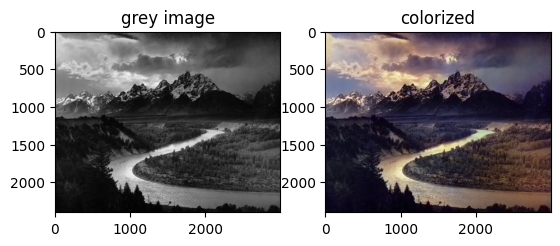

In [13]:
testimg = Image.open(testimg_data)
testimg_l_ori, testimg_l_rsize = preprocess_img(load_img(testimg_data))
testimg_c_rsize = model(testimg_l_rsize)
testimg_c_ori = postprocess_tens(testimg_l_ori, testimg_c_rsize)

import matplotlib.pyplot as plt

plt.subplot(1, 2, 1)
plt.imshow(testimg, cmap='gray')
plt.title("grey image")
plt.subplot(1, 2, 2)
plt.imshow(testimg_c_ori)
plt.title("colorized")

<center><h2>使用新数据继续训练模型</h2></center>

<hr />

PyTorch中的训练过程主要分为以下几个步骤：

- 准备数据集：将训练数据集和测试数据集准备好，并进行预处理（如图像的缩放、裁剪、旋转、翻转等）和转换（如将图像转换为Tensor）。

- 定义模型：选择适合任务的模型，如卷积神经网络、循环神经网络等，并定义其结构、参数和优化器。

- 定义损失函数：选择适合任务的损失函数，如均方误差（MSE）、交叉熵等。

- 训练模型：将数据集送入模型中进行训练。在训练过程中，需要进行迭代，每个迭代中，先将数据集分成一批批的数据（batch），再将每批数据送入模型中进行前向传播（计算模型输出结果），接着计算损失函数，并通过反向传播（计算模型参数的梯度）进行模型参数的更新。

- 验证模型：在每个epoch训练结束后，将测试数据集送入模型中进行验证，以评估模型的准确性和泛化能力。

- 保存模型：在模型训练结束后，将模型参数保存到文件中，以备后续使用。

在上面的实践中，我们已经完成了 **准备数据集** 和 **定义模型** 两个步骤。在接下来我们将对接下来的步骤进行介绍。

### 一、模型参数冻结

在此处，我们冻结了除了模型最后一个模块的所有参数。

In [14]:
for name, param in model.named_parameters():
    if "model8" in name:
        param.requires_grad = True
    else:
        param.requires_grad = False

### 二、训练部件实例化

In [15]:
from torch.optim import Adam
from torch.nn.functional import log_softmax
from torch.utils.data import DataLoader
from torch import nn

LR = 1e-3
BATCH_SIZE = 4

optim = Adam(model.parameters())

ffdataloader = DataLoader(ffdataset, batch_size=BATCH_SIZE)

class CrossEntropyLoss2d(nn.Module):
    """
    credit: https://github.com/Time0o/colorful-colorization/blob/master/colorization/modules/cross_entropy_loss_2d.py
    """
    def __init__(self):
        super().__init__()

    def forward(self, outputs, labels):
        softmax = log_softmax(outputs, dim=1)
        norm = labels.clone()
        norm[norm != 0] = torch.log(norm[norm != 0])
        return -torch.sum((softmax - norm) * labels) / outputs.shape[0]

class ColorizationLoss(nn.Module):
    def __init__(self):
        super(ColorizationLoss, self).__init__()
        self.l2_loss_ = CrossEntropyLoss2d()
    
    def forward(self, img_lab, imgpred_lab):
        l2_loss = self.l2_loss_(img_lab, imgpred_lab)
        all_loss = l2_loss
        return all_loss

class L1Loss(nn.Module):
    def __init__(self):
        super(L1Loss, self).__init__()

    def __call__(self, in0, in1):
        return torch.sum(torch.abs(in0 - in1), dim=1, keepdim=True)


class L2Loss(nn.Module):
    def __init__(self):
        super(L2Loss, self).__init__()

    def __call__(self, in0, in1):
        return torch.sum((in0 - in1)**2, dim=1, keepdim=True)


class HuberLoss(nn.Module):
    def __init__(self, delta=.01):
        super(HuberLoss, self).__init__()
        self.delta = delta

    def __call__(self, in0, in1):
        mask = torch.zeros_like(in0)
        mann = torch.abs(in0 - in1)
        eucl = .5 * (mann**2)
        mask[...] = mann < self.delta
        loss = eucl * mask / self.delta + (mann - .5 * self.delta) * (1 - mask)
        return torch.sum(loss, dim=1, keepdim=True)

### 三、训练过程定义

In [16]:
import torch
import matplotlib.pyplot as plt

INFO = "{}"

l2_loss = L2Loss()

_iter = 0
_max_iter = 1000

while True:
    # 模型设置为 train 模式
    model.train()
    for _idx, (img_lab, img_l) in enumerate(ffdataloader):
        _iter += 1
        imgpred_ab = model(img_l)
        loss = l2_loss(imgpred_ab, img_lab[:, 1: ]).mean()
        optim.zero_grad()
        loss.backward()
        optim.step()
        if _iter % 10 == 0:
            print(f"ITER [{_iter:05d}/{_max_iter:05d}] loss: {loss.item()}")
        if _iter == _max_iter:
            break

ITER [00010/01000] loss: 142.13543701171875
ITER [00020/01000] loss: 153.37515258789062
ITER [00030/01000] loss: 190.77679443359375
ITER [00040/01000] loss: 163.86656188964844
ITER [00050/01000] loss: 164.95396423339844
ITER [00060/01000] loss: 216.93484497070312
ITER [00070/01000] loss: 272.6351013183594
ITER [00080/01000] loss: 128.24888610839844
ITER [00090/01000] loss: 197.08935546875
ITER [00100/01000] loss: 161.14654541015625
ITER [00110/01000] loss: 314.50994873046875
ITER [00120/01000] loss: 112.64237213134766
ITER [00130/01000] loss: 139.52069091796875
ITER [00140/01000] loss: 114.03439331054688
ITER [00150/01000] loss: 262.5932312011719
ITER [00160/01000] loss: 150.91517639160156
ITER [00170/01000] loss: 131.6798858642578
ITER [00180/01000] loss: 102.67310333251953
ITER [00190/01000] loss: 89.0768814086914
ITER [00200/01000] loss: 156.95384216308594
ITER [00210/01000] loss: 170.41253662109375
ITER [00220/01000] loss: 172.82028198242188
ITER [00230/01000] loss: 233.70974731445

### 四、模型测试结果可视化

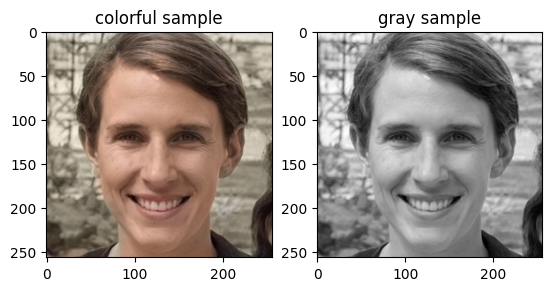

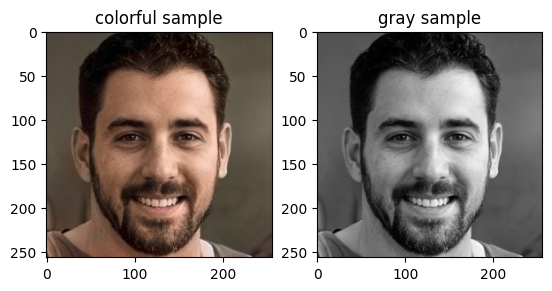

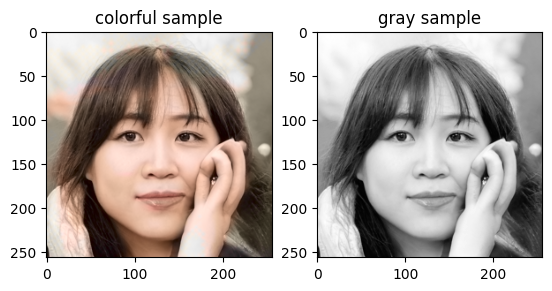

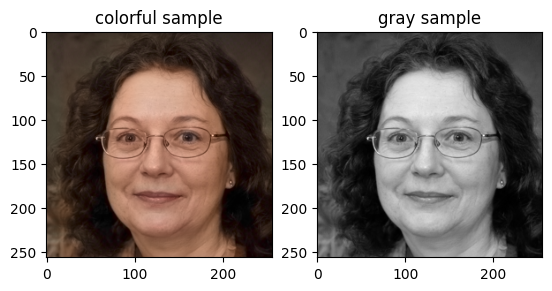

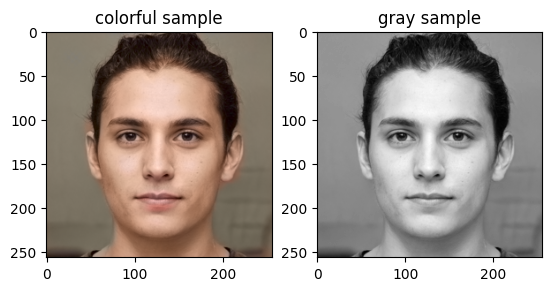

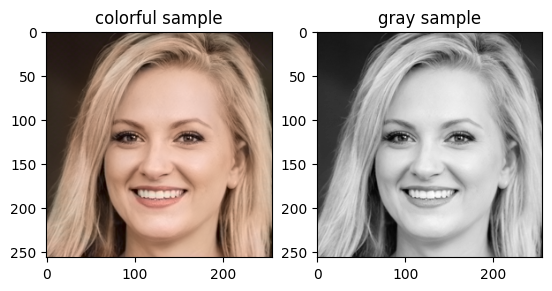

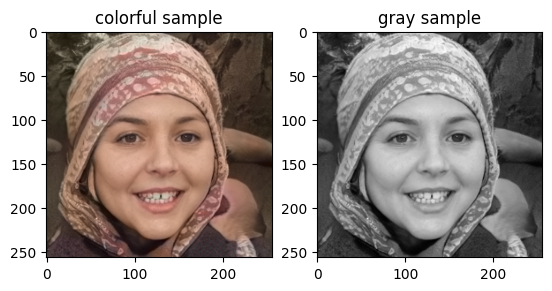

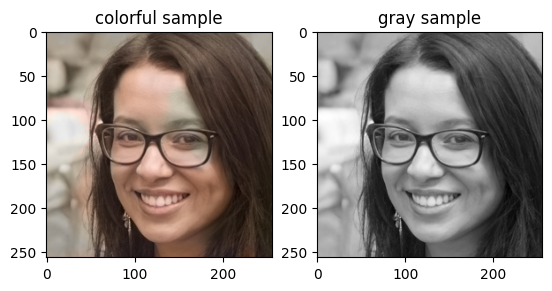

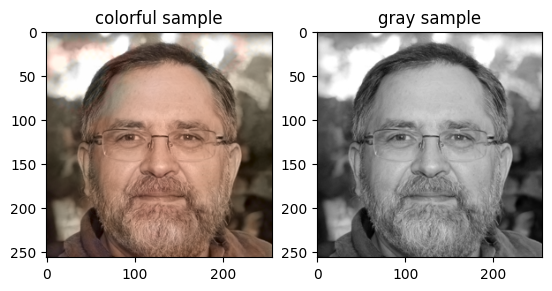

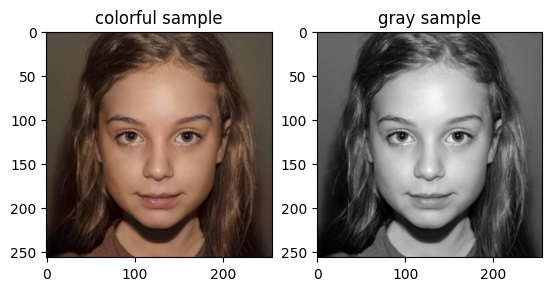

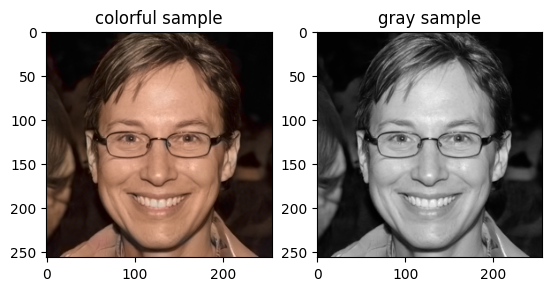

In [17]:
model.eval()
for _idx, (img_lab, img_l) in enumerate(ffdataset):
    with torch.no_grad():
        imgpred_ab = model(img_l[None, :])
    imgpred_lab = torch.cat((img_l[None, :], imgpred_ab), dim=1)
    imgpred_lab_np, img_l_np = imgpred_lab.squeeze().detach().numpy(), img_l.squeeze().detach().numpy()
    
    plt.figure();
    plt.subplot(1, 2, 1)
    plt.imshow(color.lab2rgb(imgpred_lab_np.transpose(1, 2, 0)))
    plt.title("colorful sample")
    plt.subplot(1, 2, 2)
    plt.imshow(img_l_np, cmap='gray')
    plt.title("gray sample")
    
    if _idx == 10:
        break